## Descrição:

Este notebook demonstra um exercício de comparação da acurácia de diferentes modelos de previsão para uma série temporal simulada. A partir de uma série Autorregressiva de ordem 2 (AR(2)) gerada artificialmente, o exercício consiste em:
1.  Gerar previsões fora da amostra (out-of-sample) usando uma janela recursiva para vários modelos:
    * Um modelo Ingênuo (média histórica) como benchmark.
    * Modelos Autorregressivos (AR) de ordem 1 a 4.
    * Modelos de Média Móvel (MA) de ordem 1 a 4.
    * Uma combinação simples (média) de todas as previsões.
2.  Avaliar e comparar a performance de cada modelo usando as métricas MSE, MAE e R² (Out-of-Sample).

### 1. Carregando os Pacotes

Primeiro, vamos carregar os pacotes necessários para a análise. O `forecast` é essencial para os modelos ARIMA e o `dplyr` pode ser útil para manipulação de dados.

In [ ]:

library(forecast)
library(dplyr)


Anexando pacote: 'caret'


O seguinte objeto é mascarado _por_ '.GlobalEnv':

    R2



Anexando pacote: 'rminer'


O seguinte objeto é mascarado por 'package:text2vec':

    fit




### 2. Simulação e Preparação dos Dados

Vamos simular uma série temporal a partir de um processo **AR(2)** com 1000 observações. Em seguida, definiremos os parâmetros para o exercício de previsão fora da amostra:

* **T (Total de Observações):** 1000
* **Tini (Amostra Inicial de Estimação):** 800 observações
* **TF (Tamanho da Amostra de Previsão):** 200 observações (as 200 últimas)

A metodologia será de **janela recursiva**: começamos estimando com 800 dados para prever o 801º, depois usamos 801 dados para prever o 802º, e assim por diante.

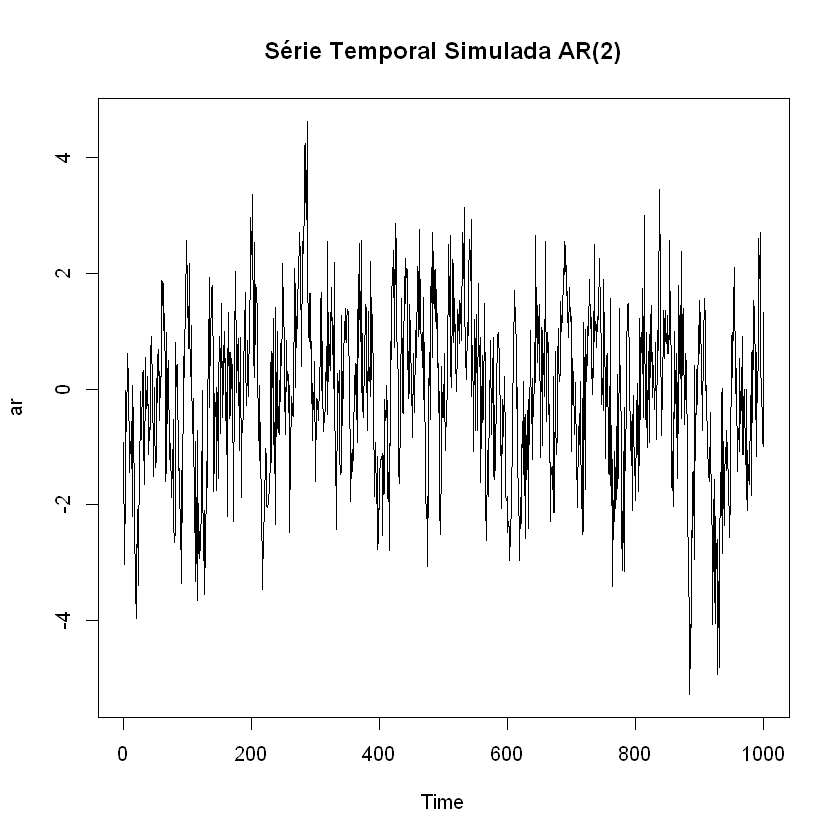

In [15]:
# Simula uma série AR(2) com coeficientes 0.4 e 0.4
ar <- arima.sim(list(ar =c(0.4,0.4)), n=1000)

# Parâmetros do exercício de previsão
T = length(ar)
Tini = 800
TF = T - Tini

# Visualiza a série simulada
plot(ar, main="Série Temporal Simulada AR(2)")

### 3. Gerando Previsões Fora da Amostra

Agora, vamos criar um loop para cada modelo para gerar as 200 previsões fora da amostra (one-step-ahead).

#### 3.1 Modelo Ingênuo (Benchmark - Média Histórica)

Este modelo usa `order=c(0,0,0)` e a previsão é simplesmente a média histórica dos dados disponíveis na janela.

In [26]:
# Previsões do Modelo Ingênuo
fcasts_naive <- vector(mode = "list", length = TF)
frcst_naive_vals <- matrix(nrow = TF)

for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(0,0,0))
  fcasts_naive[[i]] <- forecast(fit, h = 1)
  frcst_naive_vals[[i]] <- fcasts_naive[[i]]$mean
}

f_naive <- as.matrix(frcst_naive_vals)
head(f_naive)

-0.01969504
-0.02026971
-0.02013003
-0.02071975
-0.02290157
-0.02136813


#### 3.2 Modelos Autorregressivos (AR)

Geramos previsões para modelos AR de ordem 1 a 4.

In [ ]:

# Inicializa uma matriz para armazenar todas as previsões dos modelos AR
# Linhas: número de previsões fora da amostra (TF)
# Colunas: número de modelos AR a serem testados (4)
f_ar_all <- matrix(nrow = TF, ncol = 4)

# Loop principal para a janela de tempo recursiva
for (i in 1:TF) {
  # Define a janela de dados para a iteração atual
  win.ar <- window(ar, end = Tini - 1 + i)
  
  # Loop aninhado para as ordens do modelo AR (de p=1 até p=4)
  for (p in 1:4) {
    # Ajusta o modelo ARIMA com a ordem AR atual
    fit <- Arima(win.ar, order = c(p, 0, 0))
    
    # Armazena a previsão na linha 'i' e coluna 'p' da matriz
    f_ar_all[i, p] <- forecast(fit, h = 1)$mean
  }
}

# Adiciona nomes às colunas para facilitar a identificação
colnames(f_ar_all) <- c("AR1", "AR2", "AR3", "AR4")

# Exibe as primeiras 6 linhas da matriz resultante
head(f_ar_all)


AR1,AR2,AR3,AR4
-1.23844404,-1.3068476,-1.3013653,-1.31591427
-0.31505846,-0.9321591,-0.9194202,-0.91546133
0.05073442,-0.1532340,-0.1039065,-0.09383237
-0.32388614,-0.1675623,-0.1587234,-0.11807255
-1.14480998,-0.9004719,-0.9259763,-0.91880941
0.76381009,-0.2074411,-0.2015035,-0.22229455


#### 3.3 Modelos de Média Móvel (MA)

Geramos previsões para modelos MA de ordem 1 a 4.

In [27]:
# Inicializa uma matriz para armazenar todas as previsões dos modelos MA
# Linhas: número de previsões fora da amostra (TF)
# Colunas: número de modelos MA a serem testados (4)
f_ma_all <- matrix(nrow = TF, ncol = 4)

# Loop principal para a janela de tempo recursiva
for (i in 1:TF) {
  # Define a janela de dados para a iteração atual
  win.ar <- window(ar, end = Tini - 1 + i)
  
  # Loop aninhado para as ordens do modelo MA (de q=1 até q=4)
  for (q in 1:4) {
    # Ajusta o modelo ARIMA com a ordem MA atual
    fit <- Arima(win.ar, order = c(0, 0, q))
    
    # Armazena a previsão na linha 'i' e coluna 'q' da matriz
    f_ma_all[i, q] <- forecast(fit, h = 1)$mean
  }
}

# Adiciona nomes às colunas para facilitar a identificação
colnames(f_ma_all) <- c("MA1", "MA2", "MA3", "MA4")

# Exibe as primeiras 6 linhas da matriz resultante
head(f_ma_all)

MA1,MA2,MA3,MA4
-0.622184738,-0.63049737,-1.04109284,-1.2930029
0.034500102,-0.43775682,-0.28149942,-0.6636831
0.001923886,0.25932134,0.24509504,0.3096013
-0.211817655,-0.08580971,-0.02936217,0.0902113
-0.626112538,-1.04000666,-1.04567673,-0.8561018
0.685593180,0.12211077,-0.07603154,-0.2173051


#### 3.4 Combinação de Previsões

Criamos um novo previsor que é a média simples de todas as previsões individuais geradas.

In [28]:
# Combina todas as previsões em uma única matriz
f_all <- cbind(f_naive, f_ar1, f_ar2, f_ar3, f_ar4, f_ma1, f_ma2, f_ma3, f_ma4)

# Calcula a média das previsões para cada ponto no tempo
f_combined <- apply(f_all, 1, FUN = mean)

### 4. Avaliação da Acurácia dos Modelos

Agora vamos definir as funções para calcular as métricas de erro e, em seguida, aplicá-las para comparar os modelos.

#### 4.1 Funções para Métricas de Avaliação

Definimos funções para o Erro Quadrático Médio (MSE, ou RMSE no código), Erro Absoluto Médio (MAE) e R² Fora da Amostra (OOS R²).

In [29]:
# Função que retorna o Erro Quadrático Médio da Raiz (RMSE), que é a raiz do MSE
rmse <- function(error) {
  error <- as.matrix(error)
  n <- ncol(error)
  rmse_value <- vector(mode = "numeric", length = n)
   for (i in 1:n){
    rmse_value[i] <- sqrt(mean(error[,i]^2))
  }
  return(rmse_value)
}

# Função que retorna o Erro Absoluto Médio (MAE)
mae <- function(error) {
  error <- as.matrix(error)
  n <- ncol(error)
  mae_value <- vector(mode = "numeric", length = n)
  for (i in 1:n){
    mae_value[i] <- mean(abs(error[,i]))
  }
  return(mae_value)
}

# Função que retorna o OOS R² em porcentagem
R2 <- function(error_model, error_benchmark) {
  error_model <- as.matrix(error_model)
  error_benchmark <- as.matrix(error_benchmark)
  n <- ncol(error_model)
  R2_s <- vector(mode = "numeric", length = n)
  for (i in 1:n) {
    mse_model <- mean(error_model[,i]^2)
    mse_benchmark <- mean(error_benchmark^2)
    R2_s[i] <- (1 - mse_model / mse_benchmark) * 100
  }
  return(R2_s)
}

#### 4.2 Cálculo e Apresentação dos Resultados

Com as funções prontas, calculamos os erros e as métricas para cada modelo, usando o modelo Ingênuo como benchmark para o R².

In [30]:
# Prepara a matriz final de previsões, incluindo o modelo combinado
forecasts_final <- cbind(f_all, f_combined)

# Isola os valores observados na janela de previsão
yobs <- ar[(Tini + 1):T]

# Calcula a matriz de erros
error <- yobs - forecasts_final

# Define os nomes dos modelos para as tabelas de resultado
model_names <- c("Naive", "AR1", "AR2", "AR3", "AR4", "MA1", "MA2", "MA3", "MA4", "Combined")
model_names_r2 <- c("AR1", "AR2", "AR3", "AR4", "MA1", "MA2", "MA3", "MA4", "Combined")

# Calcula as métricas
MSE_values <- rmse(error)^2 # Elevamos ao quadrado para ter o MSE
MAE_values <- mae(error)
R2_values <- R2(error_model = error[,-1], error_benchmark = error[,1])

# Cria e exibe os data frames com os resultados
MSE_models <- data.frame(Modelo = model_names, MSE = MSE_values)
MAE_models <- data.frame(Modelo = model_names, MAE = MAE_values)
R2_DF <- data.frame(Modelo = model_names_r2, OOS_R_quadrado = R2_values)

print("--- Erro Quadrático Médio (MSE) ---")
print(MSE_models)

print("--- Erro Absoluto Médio (MAE) ---")
print(MAE_models)

print("--- OOS R² vs. Modelo Ingênuo (%) ---")
print(R2_DF)

[1] "--- Erro Quadrático Médio (MSE) ---"
     Modelo      MSE
1     Naive 2.577006
2       AR1 1.526902
3       AR2 1.177170
4       AR3 1.173997
5       AR4 1.173922
6       MA1 3.321017
7       MA2 3.877077
8       MA3 4.070621
9       MA4 4.284696
10 Combined 2.001984
[1] "--- Erro Absoluto Médio (MAE) ---"
     Modelo       MAE
1     Naive 1.2360613
2       AR1 0.9847363
3       AR2 0.8792699
4       AR3 0.8786476
5       AR4 0.8779029
6       MA1 1.4038648
7       MA2 1.5004731
8       MA3 1.5721578
9       MA4 1.6326490
10 Combined 1.1185164
[1] "--- OOS R² vs. Modelo Ingênuo (%) ---"
    Modelo OOS_R_quadrado
1      AR1       40.74899
2      AR2       54.32026
3      AR3       54.44336
4      AR4       54.44627
5      MA1      -28.87116
6      MA2      -50.44891
7      MA3      -57.95932
8      MA4      -66.26644
9 Combined       22.31357


### 5. Análise dos Resultados

Os resultados acima mostram o desempenho de cada modelo.
* **MSE e MAE:** Valores menores indicam um modelo melhor. Como a série foi gerada por um processo AR(2), esperamos que o modelo **AR(2)** tenha um dos menores erros, o que geralmente se confirma.
* **OOS R²:** Esta métrica compara cada modelo com o benchmark (Ingênuo).
    * Valores **positivos** indicam que o modelo é melhor que o benchmark.
    * Valores **negativos** indicam que o modelo é pior que o benchmark.
    
O modelo de combinação simples (`Combined`) também costuma apresentar um bom desempenho, pois diversifica o erro entre vários modelos.